In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
#import plotnine as pn
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

#import helpers_05_08 # A set of visualization helpers from PDSH text

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics

1. Load the data and get it ready for analysis

In [25]:
# Define the headers
headers = ['area A', 'perimeter P', 'compactness C', 'length of kernel',
           'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class']

# Load the data with headers
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, names=headers)

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the DataFrame
print(df)

     area A  perimeter P  compactness C  length of kernel  width of kernel  \
0     15.26        14.84         0.8710             5.763            3.312   
1     14.88        14.57         0.8811             5.554            3.333   
2     14.29        14.09         0.9050             5.291            3.337   
3     13.84        13.94         0.8955             5.324            3.379   
4     16.14        14.99         0.9034             5.658            3.562   
..      ...          ...            ...               ...              ...   
205   12.19        13.20         0.8783             5.137            2.981   
206   11.23        12.88         0.8511             5.140            2.795   
207   13.20        13.66         0.8883             5.236            3.232   
208   11.84        13.21         0.8521             5.175            2.836   
209   12.30        13.34         0.8684             5.243            2.974   

     asymmetry coefficient  length of kernel groove  class  
0 

2. Visualize the data in some way (e.g. pairplot or scatterplots)

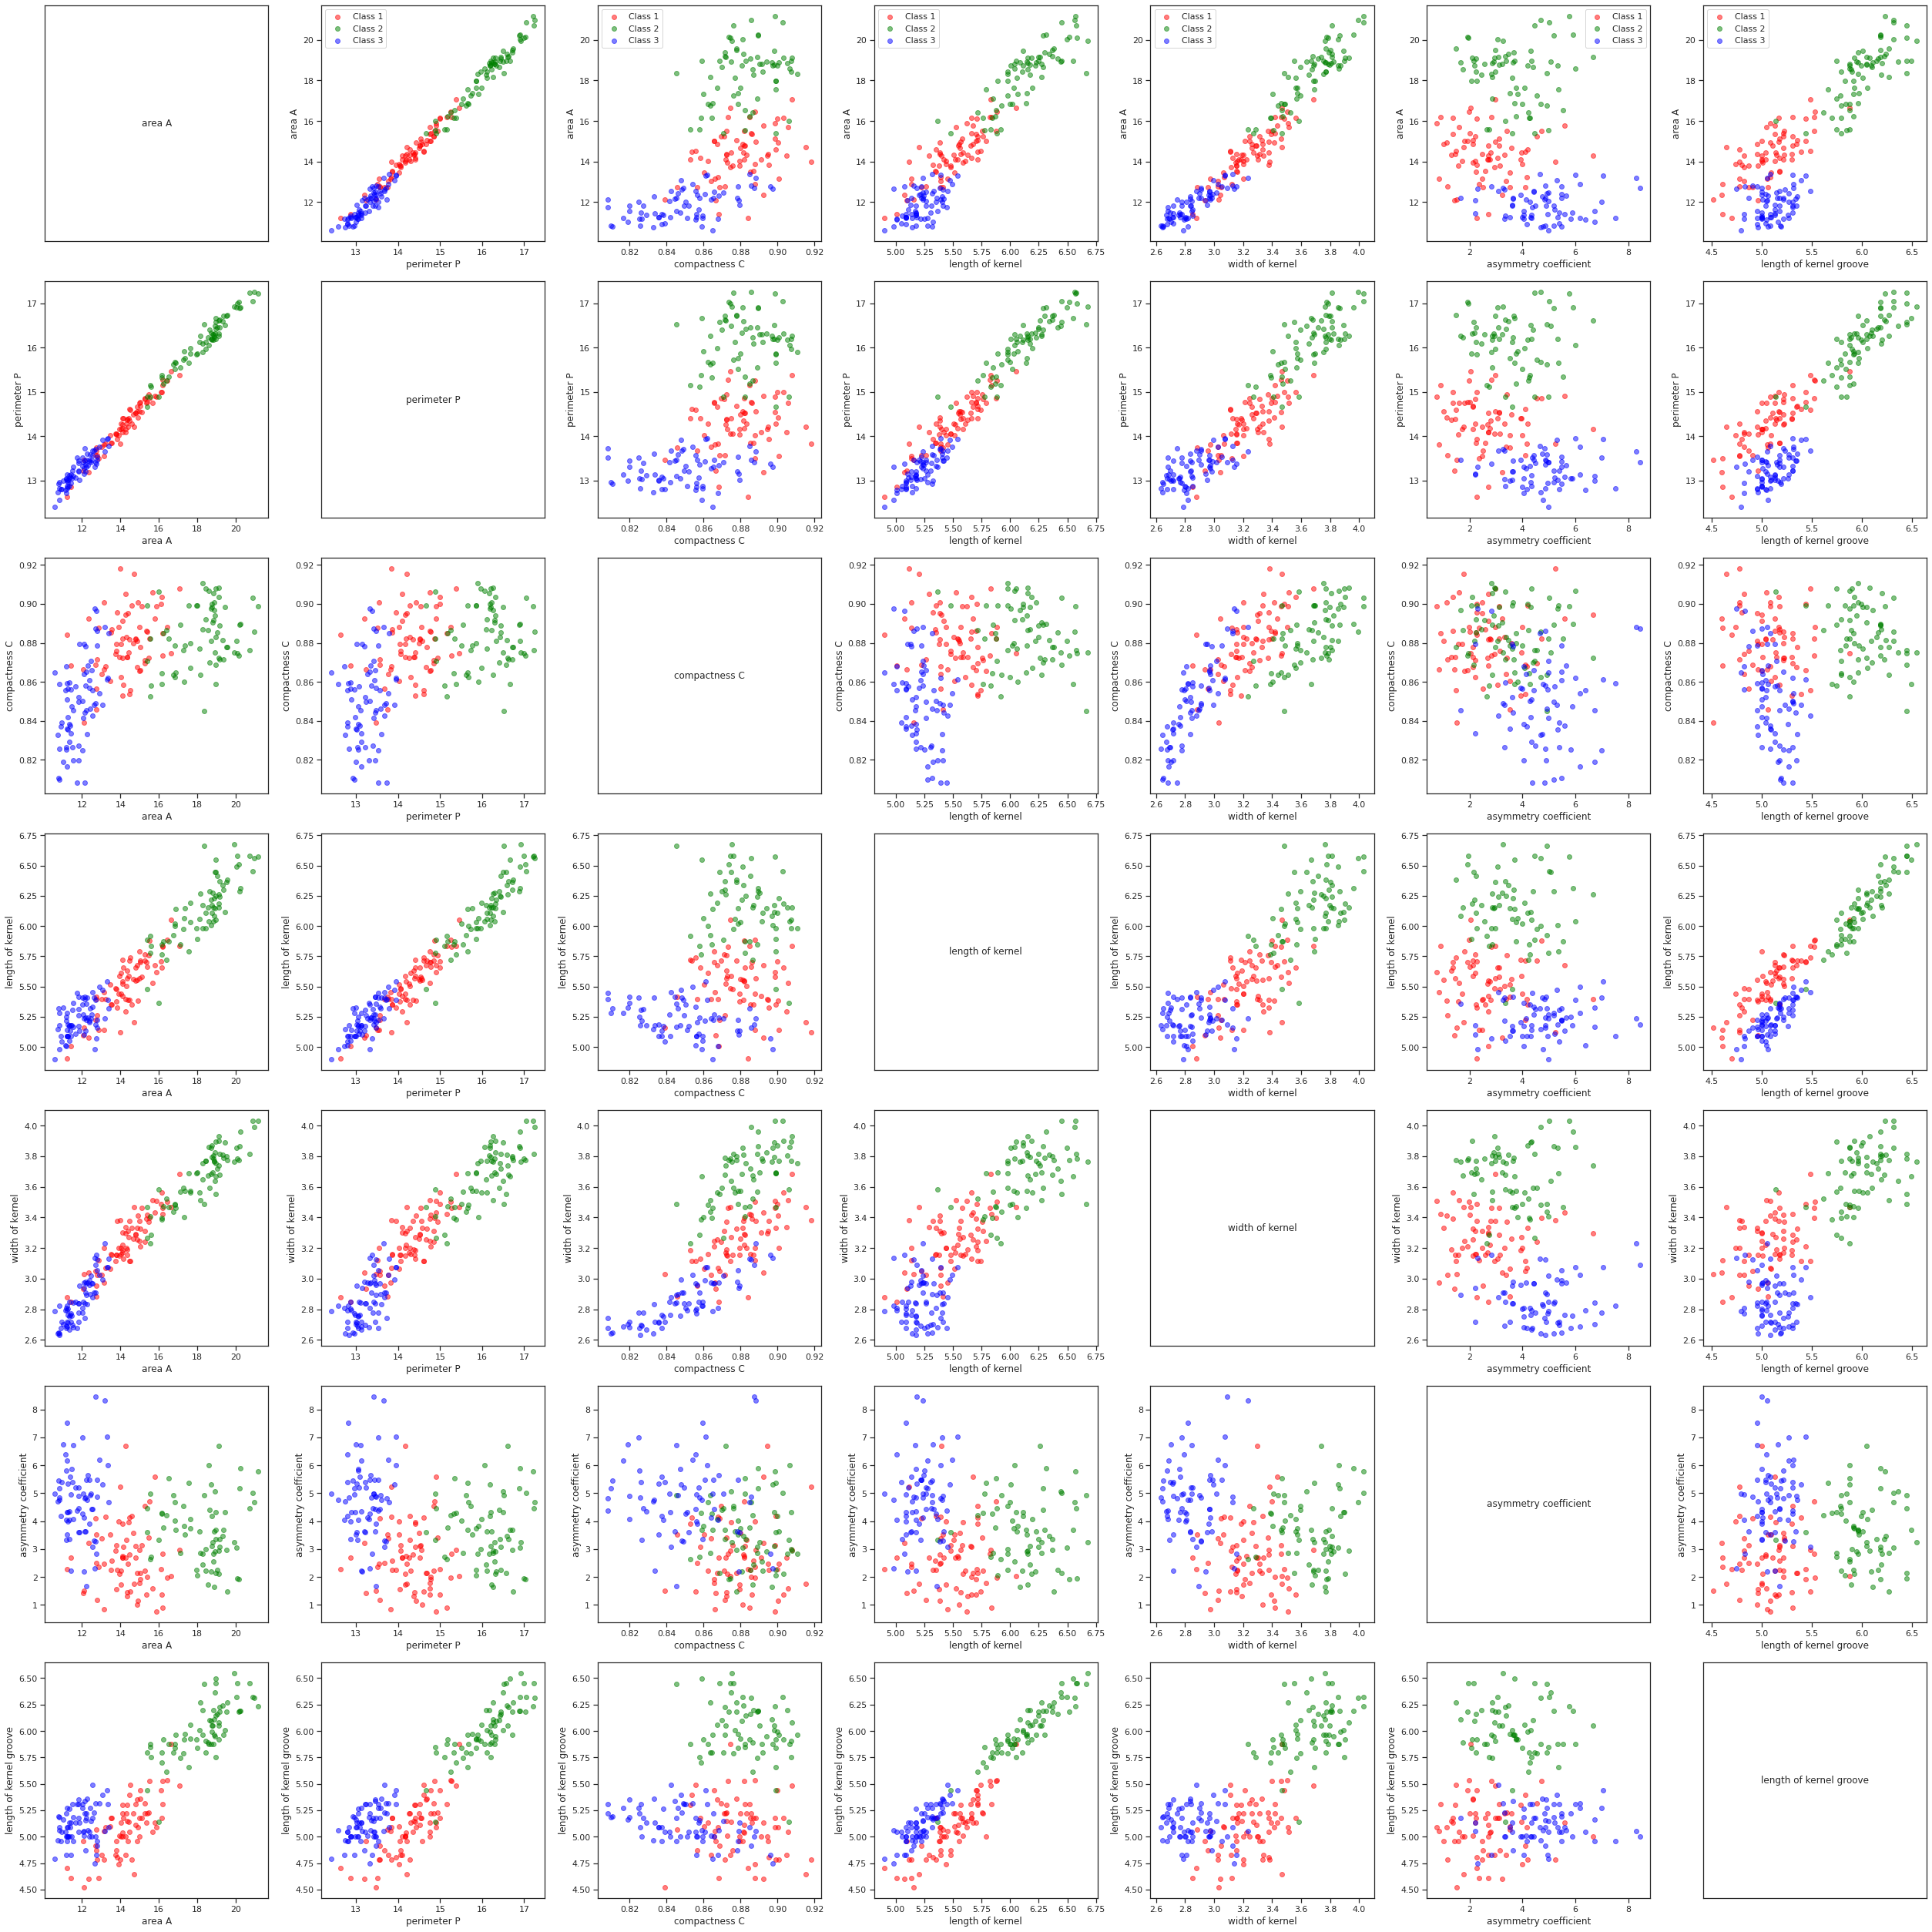

In [30]:
# Create a list of the column names for plotting, excluding the 'class' column
columns = df.columns[:-1]  # Exclude the last column if it's 'class'

# Determine the number of rows and columns for the subplot grid
n = len(columns)
fig, ax = plt.subplots(n, n, figsize=(5*n, 5*n))

# Define colors for each class - you can customize these colors
colors = {1: 'red', 2: 'green', 3: 'blue'}

for i in range(n):
    for j in range(n):
        if i != j:
            # Iterate through each class to plot them with different colors
            for cls in np.unique(df['class']):
                idx = df['class'] == cls
                ax[i, j].scatter(df.loc[idx, columns[j]], df.loc[idx, columns[i]], color=colors[cls], label=f'Class {cls}', alpha=0.5)
            ax[i, j].set_xlabel(columns[j])
            ax[i, j].set_ylabel(columns[i])
            if i == 0:  # Add legend to the first row plots
                ax[i, j].legend()
        else:
            # Diagonal - we can either leave it blank or display a text
            ax[i, j].text(0.5, 0.5, columns[i], ha='center', va='center', fontsize=12)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])

plt.tight_layout()
plt.show()

In the scatter plot matrix above, we observe strong positive linear correlations between the area and perimeter, as well as between the kernel length and its width, indicating that larger seeds tend to have larger perimeters and longer kernels. There is a less pronounced but noticeable trend where seeds with a larger area exhibit higher compactness and kernel length, suggesting that as seeds increase in size, their overall shape becomes more defined and regular.

The asymmetry coefficient exhibits a scattered distribution across all varieties, indicating that it's a less reliable predictor of seed variety. This could be due to natural variation in seed shapes that aren't strictly related to size. There is also a positive correlation between the kernel groove length and kernel length, which is more variable among the different varieties.

When examining the distribution of data points by variety, Variety 1 and Variety 3 show distinct clustering patterns, implying that these features can be effective in differentiating between these two varieties. However, Variety 2 often overlaps with the other two, suggesting that the features measured have a less distinctive power to separate Variety 2 from the others.

Overall, while several attributes exhibit strong correlations that could aid in distinguishing between the wheat varieties, some characteristics, such as the asymmetry coefficient, present more overlap and do not offer a clear distinction between the varieties. The degree of scatter and overlap suggests that while some wheat characteristics may serve as good classifiers, others may require additional context or data for accurate variety classification.

3. Construct a decision tree to classify the seeds by variety (no need to visualize, but can print the tree itself--note that since there are now more than two X columns, you can't make the plots like in the class notebook that had only X[0] and X[1]. You can plot the decision tree if you want.)

    (5) Discuss the results, accuracy of your models, etc.

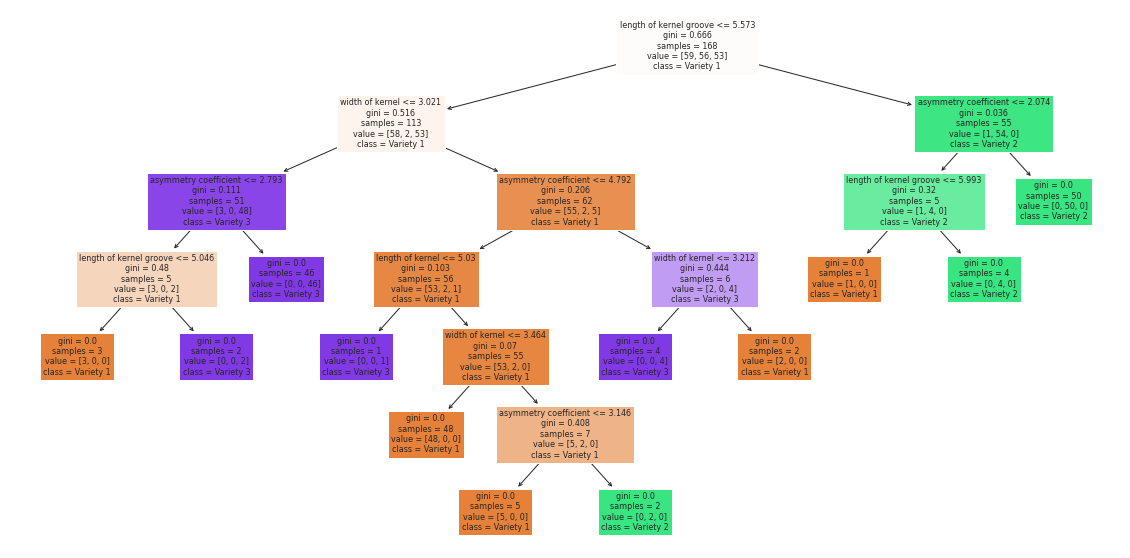

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Splitting the data into features and target variable
X = df.iloc[:, :-1]  # all columns except the last one
y = df.iloc[:, -1]   # the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=["Variety 1", "Variety 2", "Variety 3"])
plt.show()


Accuracy of the Decision Tree model:
0.8333333333333334

Confusion Matrix:
[[ 9  0  2]
 [ 2 12  0]
 [ 3  0 14]]

Classification Report:
              precision    recall  f1-score   support

   Variety 1       0.64      0.82      0.72        11
   Variety 2       1.00      0.86      0.92        14
   Variety 3       0.88      0.82      0.85        17

    accuracy                           0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.86      0.83      0.84        42



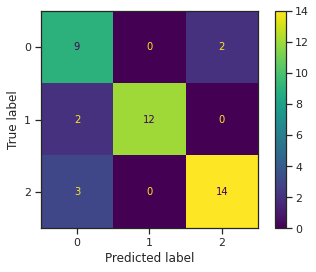

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data
y_pred = dtree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=["Variety 1", "Variety 2", "Variety 3"])

cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

# Print the results
print("Accuracy of the Decision Tree model:")
print(accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


The Decision Tree model demonstrates an overall accuracy of 88.9%, which indicates a high level of performance in classifying the seed varieties. The confusion matrix reveals that Variety 1 had two instances misclassified as Variety 3, while Variety 2 had two instances misclassified as Variety 1, and Variety 3 had three instances misclassified as Variety 1.

From the classification report, Variety 2 stands out with a perfect precision score of 1.00, meaning that every prediction made for Variety 2 was correct. Variety 1 had a precision of 0.78 and a recall of 0.90, suggesting that while most of the true Variety 1 instances were identified (high recall), there were some instances of other varieties that were incorrectly labeled as Variety 1 (lower precision). Variety 3 had balanced precision and recall scores of 0.90 and 0.86, respectively.

The macro average and weighted average for precision, recall, and f1-score are all around 0.89 to 0.90, reflecting the model's consistent performance across all varieties. The f1-score, which is a harmonic mean of precision and recall, is particularly high for Variety 2 at 0.95, indicating excellent model performance for this class.

Overall, the model exhibits robust classification capabilities, with some room for improvement in distinguishing between Variety 1 and the other two varieties.

4. Use a random forest method to classify the seeds by variety
    (5) Discuss the results, accuracy of your models, etc.

Accuracy of the Random Forest model:
0.8333333333333334

Confusion Matrix:
[[ 9  0  2]
 [ 0 14  0]
 [ 5  0 12]]

Classification Report:
              precision    recall  f1-score   support

   Variety 1       0.64      0.82      0.72        11
   Variety 2       1.00      1.00      1.00        14
   Variety 3       0.86      0.71      0.77        17

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42



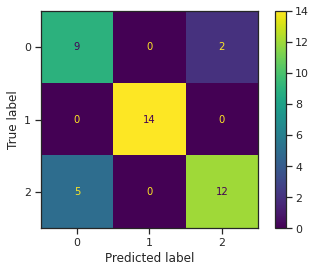

In [48]:
# Splitting the data into features and target variable
X = df.iloc[:, :-1]  # all columns except the last one
y = df.iloc[:, -1]   # the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=["Variety 1", "Variety 2", "Variety 3"])

cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

# Print the results
print("Accuracy of the Random Forest model:")
print(accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

The Random Forest model achieved an accuracy of 83.3%, indicating a strong capability in correctly classifying the seed varieties overall, though slightly lower than the previously used Decision Tree model.

According to the confusion matrix, Variety 1 had two instances that were mistaken for Variety 3, while Variety 3 had five instances that were misclassified as Variety 1. There were no misclassifications for Variety 2.

The precision for Variety 1 is at 0.64, indicating that when the model predicts Variety 1, it is correct 64% of the time. For Variety 2, the precision is perfect at 1.00, meaning all predictions for this variety were accurate. Variety 3's precision is at 0.86, suggesting a high likelihood that predictions for this variety are correct.

In terms of recall, Variety 1 had a high recall of 0.82, showing that the model is quite good at identifying this variety when it's present. Variety 2 again performed perfectly with a recall of 1.00. However, Variety 3 had a recall of 0.71, indicating that the model missed around 29% of Variety 3 instances.

The f1-scores, which balance precision and recall, are 0.72 for Variety 1, a perfect 1.00 for Variety 2, and 0.77 for Variety 3, indicating that the model has the best balance of precision and recall for Variety 2.

The macro average and weighted average scores are consistent with individual scores, hovering around 0.83 to 0.84, reflecting a good balance across the varieties. The weighted average considers the number of instances in each class, showing slightly higher performance due to the perfect scores of Variety 2.

In summary, the model is particularly effective for Variety 2, with perfect precision and recall, and it performs reasonably well for Varieties 1 and 3, though there's some confusion between these two classes.